In [1]:
import os
if not os.path.basename(os.getcwd()) == "datenguide-python":
    os.chdir("..")

In [2]:
from datenguidepy.query_builder import Query, Field
from datenguidepy.query_execution import QueryExecutioner
from datenguidepy.output_transformer import QueryOutputTransformer

from datenguidepy.query_helper import (
    get_statistics,
    get_regions,
    #siblings, #further functions to help with regions
    #regions_to_config_helper, 
    #hirachy_down,federal_states,
    #federal_states,
)

In [3]:
q = Query.region('01')
statistic = q.add_field('BEV001')
statistic2 = q.add_field('BEVSTD')

In [4]:
results = q.results()

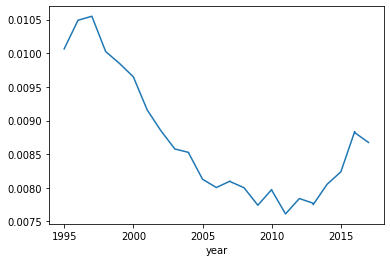

In [5]:
%matplotlib inline
(
    results
    .assign(
        birth_rate_1000 = lambda df: df.BEV001/df.BEVSTD
    )
    .set_index('year')
    .loc[:,'birth_rate_1000']
    .plot()
)

In [6]:
reg = get_regions()
reg.head()

,name,level,parent
region_id,,,
10,Saarland,nuts1,DG
11,Berlin,nuts1,DG
12,Brandenburg,nuts1,DG
13,Mecklenburg-Vorpommern,nuts1,DG
14,Sachsen,nuts1,DG


In [7]:
relevant_region_subset = reg.query('level == "nuts1"').name
relevant_region_subset

region_id
10                   Saarland
11                     Berlin
12                Brandenburg
13     Mecklenburg-Vorpommern
14                    Sachsen
15             Sachsen-Anhalt
16                  Thüringen
01         Schleswig-Holstein
02                    Hamburg
03              Niedersachsen
04                     Bremen
05        Nordrhein-Westfalen
06                     Hessen
07            Rheinland-Pfalz
08    Baden-Württemberg, Land
09                     Bayern
Name: name, dtype: object

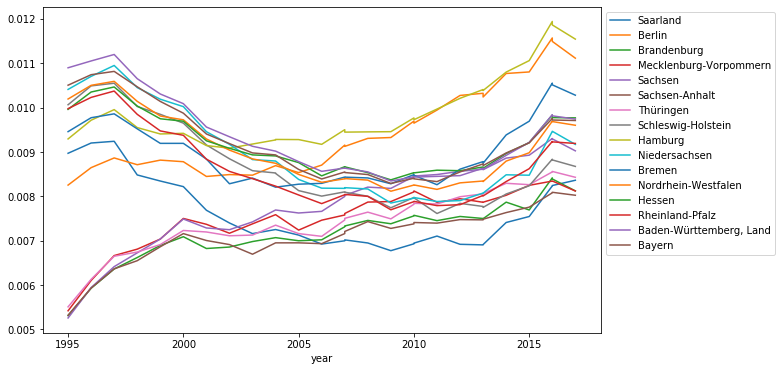

In [8]:
import matplotlib.pyplot as plt

ax = plt.gca()

for code,name in (relevant_region_subset.iteritems()):
    q = Query.region(code)
    statistic = q.add_field('BEV001')
    statistic2 = q.add_field('BEVSTD')
    results = q.results()
    (
    results
    .assign(
        birth_rate_1000 = lambda df: df.BEV001/df.BEVSTD
    )
    .set_index('year')
    .loc[:,'birth_rate_1000']
    .plot(axes = ax,label= name)
    )
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.gcf().set_size_inches(10,6)

16 might already be too much to plot in one graph statically. I would suggest simpler examples or the use of an interactive plotting tool like bokeh or dash/plotly. The latter would help to distinguish lines on demand. Gridplots with shared axis might also work nicely as a 4x4.